# Ex12-2: Lit-Sphere

Pr12_1_LightPath.blendを使って必要な中間画像を出力して実験してみましょう．
- normal

## Ex12の実装部分

- litsphre_lookup関数を実装してください

ヒント: 以下の要領で実装すればOKです．

```
# 画像の幅と高さの取得
h, w = T.shape[:2]

# Work: x座標の計算(以下を修正)
x = int(N[0]とwの式)

# Work: y座標の計算(以下を修正)
y = int(N[1]とhの式)

# (x, y)座標の色の参照
return T[y, x, :]
```

- N[0]: [0, 1]⇒x: [0, w-1]
- N[1]: [0, 1]⇒y: [h-1, 0]

になるように変換式を作ってみましょう．
（yは順番が逆転するので注意）




In [1]:
# Work: 以下の関数を修正．
def litsphre_lookup(T, N):
  # 画像の幅と高さの取得
  h, w = T.shape[:2]

  # Work: x座標の計算(以下を修正)
  x = (w-1) * N[0]

  # Work: y座標の計算(以下を修正)
  y = (h-1) * (1 - N[1])
  
  return T[y, x, :]

## 補助関数

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# 画像読み込み
def imread(img_file):
  I = cv2.imread(img_file, -1)
  I = cv2.cvtColor(I, cv2.COLOR_BGRA2RGBA)
  return np.float32(I) / 255.0

# テクスチャ読み込み
def texread(img_file):
  I = cv2.imread(img_file, -1)
  I = cv2.cvtColor(I, cv2.COLOR_BGRA2RGBA)
  # I = cv2.resize(I, dsize=(128, 128))
  return np.float32(I) / 255.0


# 入力画像のプロット
def plot_inputs(T, N):
  fig = plt.figure(figsize=(12,6))
  plt.subplot(1, 2, 1)
  plt.imshow(T)
  plt.axis("off")
  plt.title("2D Texture")

  ax = plt.subplot(1, 2, 2)
  ax.patch.set_facecolor([0.2, 0.25, 0.25]) 
  plt.imshow(N)
  plt.xticks([])
  plt.yticks([])
  plt.title("Normal")

## Lit-Sphereの入力画像

レンダリング画像を使ってLit-Sphereを実験しましょう．
- tex_fileを色々切り替えて実験してください．

libpng warning: iCCP: known incorrect sRGB profile


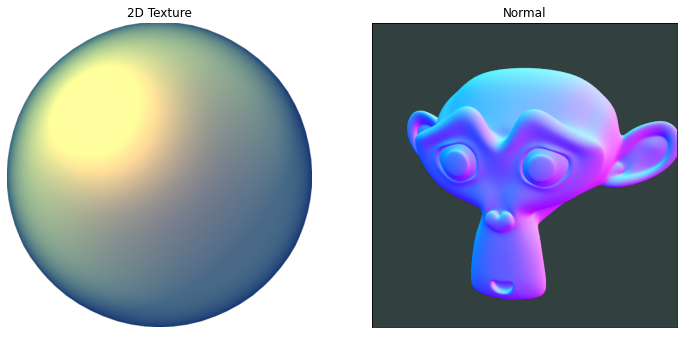

In [5]:
#@title Shadingパラメータ { run: "auto" }

#@markdown XToonテクスチャ画像
tex_file = "BluePearl.png"  #@param {type:"string"}
T = texread(tex_file)

#@markdown 法線画像
N_file = "normal0050.png"  #@param {type:"string"}
N_img = imread(N_file)


plot_inputs(T, N_img)

## 結果画像の確認

Text(0.5, 1.0, 'Lit-Sphere')

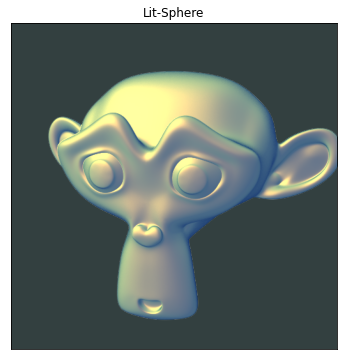

In [11]:
h, w = N_img.shape[:2]
A = N_img[:,:,3]

I = np.array([litsphre_lookup(T, N) for N in N_img.reshape(-1, 4)])

I = I.reshape(h, w, -1)[:,:,:3]

fig = plt.figure(figsize=(12,6))
ax = plt.subplot(1, 1, 1)
ax.patch.set_facecolor([0.2, 0.25, 0.25]) 
plt.imshow(np.dstack([I, A]))
plt.xticks([])
plt.yticks([])
plt.title("Lit-Sphere")